In [1]:
import pandas as pd
data_df=pd.read_csv('iris.csv')

In [3]:
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df=data_df.iloc[:,1:5]
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.shape

(150, 4)

In [6]:
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [7]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


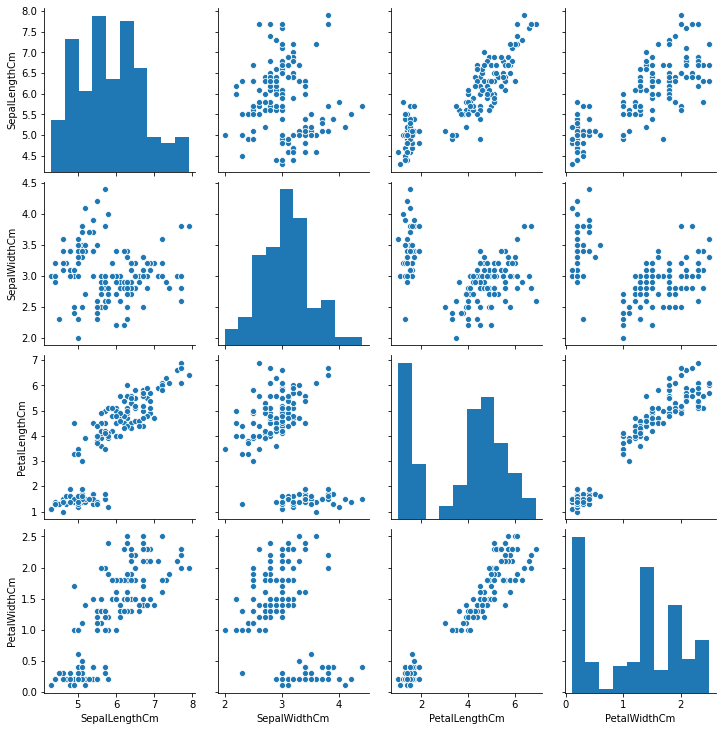

In [8]:
import seaborn as sns
sns.pairplot(iris_df)

In [12]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(iris_df)
label=model_kmeans.predict(iris_df)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


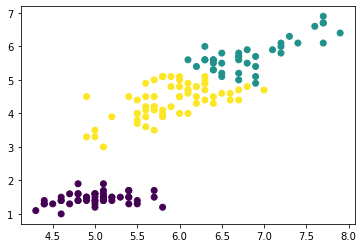

In [14]:
import matplotlib.pyplot as plt
sl=iris_df["SepalLengthCm"]
pl=iris_df["PetalLengthCm"]
plt.scatter(sl,pl,c=label)

In [15]:
sample=[[5.7,10.2,1.2,0.4]]
new_label=model_kmeans.predict(sample)
print(new_label)

[0]


In [16]:
model_kmeans.inertia_

78.94084142614601

In [17]:
ks=range(1,6)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(iris_df)
    inertia.append(model.inertia_)

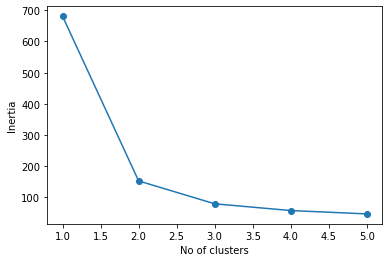

In [18]:
plt.plot(ks,inertia,"-o")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [19]:
#evaluate the model
data_df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [23]:
data_df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [29]:
species=data_df["Species"]
df=pd.DataFrame({"label":label,"species":species})

In [30]:
df.head()

,label,species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa


In [32]:
pd.crosstab(df["label"],df["species"])

species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,2,36
2,0,48,14


In [38]:
#standardscalara
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(scalar,model_kmeans)
pipe.fit(iris_df)
label_sc=pipe.predict(iris_df)
print(label_sc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [39]:
species=data_df["Species"]
df=pd.DataFrame({"label":label_sc,"Species":species})
df

,label,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
...,...,...
145,2,Iris-virginica
146,0,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [41]:
pd.crosstab(df["label"],df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [43]:
#Normalisation
from sklearn.preprocessing import Normalizer
norm=Normalizer()
pipe1=make_pipeline(norm,model_kmeans)
pipe1.fit(iris_df)
label_no=pipe1.predict(iris_df)
print(label_no)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
species=data_df["Species"]
df=pd.DataFrame({"label":label_no,"Species":species})
df

,label,Species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [45]:
pd.crosstab(df["label"],df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,45,0
2,0,5,50


In [46]:
#load the dataset
import pandas as pd
data_df=pd.read_csv("iris.csv")

In [48]:
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
iris_df=data_df.iloc[:,1:5]
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [50]:
#normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
iris_df=norm.fit_transform(iris_df)

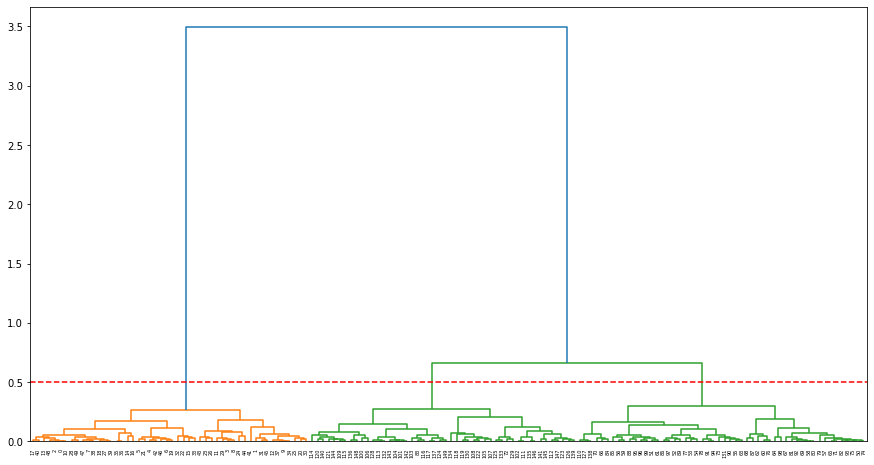

In [56]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
linked=linkage(iris_df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.hlines(0.5,0,5000,colors="r",linestyles="dashed")
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(iris_df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [63]:
df=pd.DataFrame({"Labels":labels,"Species":data_df["Species"]})
df

,Labels,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [65]:
pd.crosstab(df["Labels"],df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,0,48,4
1,50,0,0
2,0,2,46
